## A Python notebook for plotting a confusion matrix
* A **confusion matrix is a common ML metric** to check known "groundtruth" labels or the training experiment labels against either predicted labels (as in classification) or resulting groups (as in k-means clustering).  
* The **"groundtruth" data, here, are the labels known before** the workflow or experiment even begins and we'd like to compare how accurate they are to the results of the learner.  
* **In this case we are grouping data (unlabeled) with a k-means** algorithm.  We have done this already in Azure Machine Learning Studio and wish to use the exported data in a python `matplotlib` confusion matrix.
* I removed my `experiments` id and `node_id`.  **You won't have to worry about these ids** when opening a Python notebook from Studio (They are filled in for you)

In [ ]:
# Auto-generated code snippet from Azure Machine Learning Studio

from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['<experiment id>'] # auto filled when opening from AML
ds = experiment.get_intermediate_dataset(
    node_id='<your node id>', # auto generated when opening from AML
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

**Side note:** you could also have opened a dataset living as a csv file (also other formats) at a URL with, for example:

```python
# Dataset living on my github account exported from Azure ML
url = 'https://raw.githubusercontent.com/michhar/michhar.github.io/gh-pages-source/resources/data/ngrams_and_clustering_result_dataset.csv'

# Importing the csv data with pandas
frame = pd.read_csv(url)
```

Onto the packages allowing us to manipulate numbers in dataframes and fast numerical arrays as well as our classic `matplotlib` functionality.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Let's begin working with our dataset

In [3]:
# Creating our confusion matrix data
cm = pd.crosstab(frame['Category'], frame['Assignments'])
print(cm)

Assignments                   0  1   2  3   4  5   6   7   8   9
Category                                                        
Consumer Discretionary       43  0   3  1   0  0   1  20   4   4
Consumer Staples             14  0   0  0   9  0   2   4   0   6
Energy                        2  1   0  1  12  0  28   0   0   0
Financials                   16  0   3  3   0  0   3   8  42   3
Health Care                   3  0   0  1   1  0   0   0   0  47
Industrials                  15  2   7  5   7  1  11   2   2   7
Information Technology        9  3  23  2   4  0   3   2   7   6
Materials                     4  0   0  0   9  5   4   2   1   5
Telecommunications Services   2  0   1  0   0  0   1   1   0   0
Utilities                     0  0   0  0  26  0   2   0   0   0


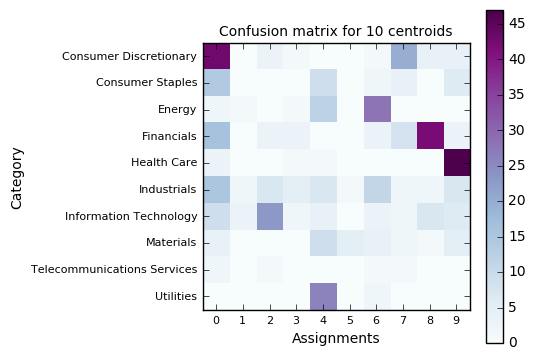

In [6]:
# Plot our confusion matrix
# Code based on:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.BuPu):
    # Set figure size before anything else
    colcnt = len(cm.columns)
    rowcnt = len(cm.index)
    plt.figure(figsize=(colcnt/1.2,rowcnt/1.2))

    # Show the plot
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Give the plot a title and colorbar legend
    plt.title('%s for %d centroids' % (title, len(cm.columns)), size=10)
    plt.colorbar()

    # All thes stuff for the tick mark labels
    xtick_marks = np.arange(len(cm.columns))
    ytick_marks = np.arange(len(cm.index))
    plt.xticks(xtick_marks, cm.columns, size=8)
    plt.yticks(ytick_marks, cm.index, size=8)
    
    # Just the regular xlabel and ylabel for plot
    plt.ylabel(cm.index.name)
    plt.xlabel(cm.columns.name)
    
    # Setting to offset the labels with some space so they show up
    plt.subplots_adjust(left = 0.5, bottom=0.5)

# Plot the confusion matrix DataFrame
plot_confusion_matrix(cm)

For an interactive version of this notebook, check out the free service link at:  